In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d

In [ ]:
url = "https://raw.githubusercontent.com/UofT-DSI/LCR/refs/heads/main/01_materials/notebooks/dataset/wdbc.csv"
cancer = pd.read_csv(url)

In [ ]:
cancer.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M': 'Malignant', 'B': 'Benign'})

In [ ]:
cancer.diagnosis.unique()

array(['Malignant', 'Benign'], dtype=object)

In [ ]:
cancer['diagnosis'].value_counts()

,count
diagnosis,
Benign,357
Malignant,212


In [ ]:
cancer.diagnosis.value_counts(normalize=True)

,proportion
diagnosis,
Benign,0.627417
Malignant,0.372583


In [ ]:
cancer.groupby('diagnosis').size()

,0
diagnosis,
Benign,357
Malignant,212


In [ ]:
cancer.groupby('diagnosis').size()/cancer.shape[0]

,0
diagnosis,
Benign,0.627417
Malignant,0.372583


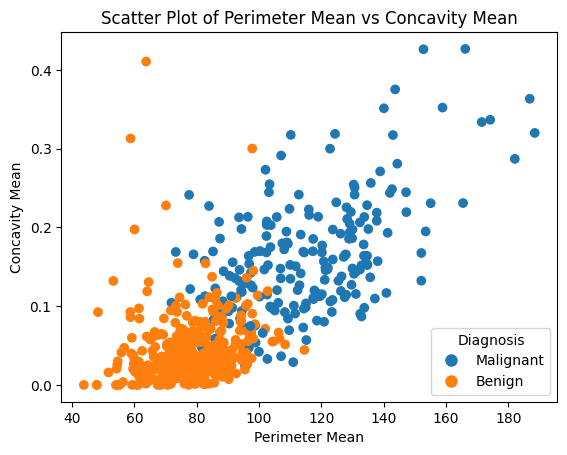

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer["concavity_mean"],
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add labels and legend
plt.xlabel("Perimeter Mean")
plt.ylabel("Concavity Mean")
plt.title("Scatter Plot of Perimeter Mean vs Concavity Mean")
plt.legend(handles=handles, title="Diagnosis")
plt.show()



NameError: name 'mlines' is not defined

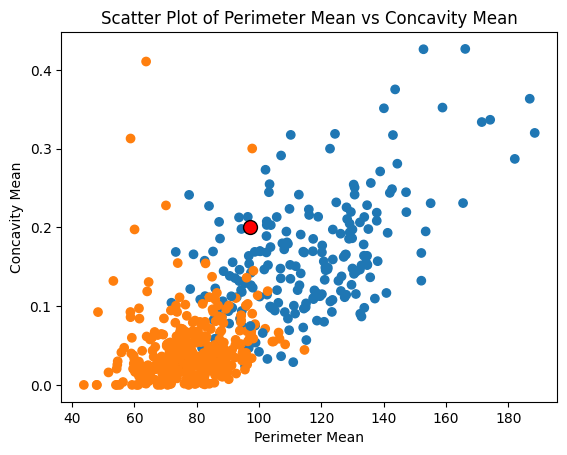

In [ ]:


# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer["concavity_mean"],
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')

# Add labels and legend
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [mlines.Line2D([0], [0], marker='o', color='w',
                                            markerfacecolor='red', markeredgecolor='black',
                                            markersize=10, label='New Observation')],
           title='Diagnosis')
plt.show()

In [ ]:
#new observation
new_obs_Perimeter = 97
new_obs_Concavity = 0.20

In [ ]:
#Distance calculation
cancer['dist_from_new'] =(
(cancer['perimeter_mean'] - new_obs_Perimeter)**2 +
(cancer['concavity_mean'] - new_obs_Concavity)**2
) **(1/2)

In [ ]:
cancer.dist_from_new.head()

,dist_from_new
0,25.800194
1,35.900178
2,33.000000
3,19.420044
4,38.100000


In [ ]:
nearest_5 = cancer.nsmallest(5, 'dist_from_new')[[
    'perimeter_mean', 'concavity_mean', 'diagnosis', 'dist_from_new'
]]

nearest_5

,perimeter_mean,concavity_mean,diagnosis,dist_from_new
291,97.03,0.05940,Benign,0.143765
138,96.85,0.15390,Malignant,0.156924
15,96.73,0.16390,Malignant,0.272403
514,97.26,0.07486,Malignant,0.288548
54,97.26,0.05253,Malignant,0.298910


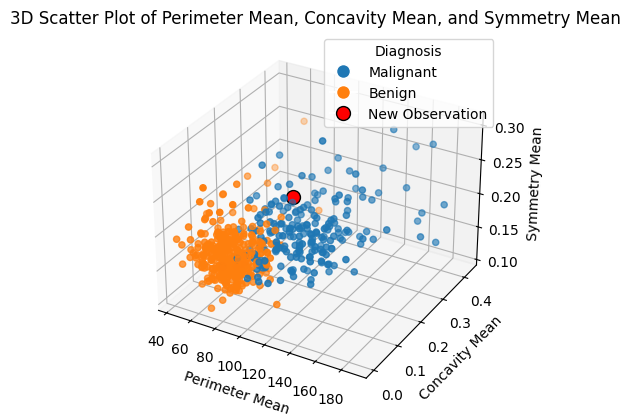

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting

# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with color corresponding to diagnosis
ax.scatter(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'],
           c=cancer['diagnosis'].map(color_map), marker='o')

# Define the new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

# Plot the new observation
ax.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
           new_observation['symmetry_mean'], color='red', edgecolor='black',
           s=100, marker='o', label='New Observation')

# Add axis labels and title
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [mlines.Line2D([], [], marker='o', color='w', label=label,
                         markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add custom legend for new observation
handles.append(mlines.Line2D([], [], marker='o', color='w', label='New Observation',
                             markersize=10, markerfacecolor='red', markeredgecolor='black'))

# Add legend to the axes
ax.legend(handles=handles, title='Diagnosis')

# Show plot
plt.show()


In [ ]:
new_obs_Perimeter = 97
new_obs_Concavity = 0.2
new_obs_Symetry = 0.22

In [ ]:
cancer['dist_from_new'] =((cancer['perimeter_mean'] - new_obs_Perimeter) ** 2 +
(cancer['concavity_mean'] - new_obs_Concavity) ** 2 +
(cancer['symmetry_mean'] - new_obs_Symetry) ** 2) ** (1/2)



In [ ]:
cancer.dist_from_new

,dist_from_new
0,25.800203
1,35.900199
2,33.000003
3,19.420085
4,38.100020
...,...
564,45.000046
565,34.200075
566,11.300676
567,43.100270


In [ ]:
nearest_5 = cancer.nsmallest(5, 'dist_from_new')[[
    'perimeter_mean', 'concavity_mean', 'symmetry_mean', 'diagnosis', 'dist_from_new'
]]
nearest_5

,perimeter_mean,concavity_mean,symmetry_mean,diagnosis,dist_from_new
291,97.03,0.05940,0.1879,Benign,0.147305
138,96.85,0.15390,0.1957,Malignant,0.158795
15,96.73,0.16390,0.2303,Malignant,0.272597
514,97.26,0.07486,0.1561,Malignant,0.295539
54,97.26,0.05253,0.1616,Malignant,0.304562


In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

cancer_train = cancer[["diagnosis", "perimeter_mean", "concavity_mean"]]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Malignant,122.80,0.30010
1,Malignant,132.90,0.08690
2,Malignant,130.00,0.19740
3,Malignant,77.58,0.24140
4,Malignant,135.10,0.19800
...,...,...,...
564,Malignant,142.00,0.24390
565,Malignant,131.20,0.14400
566,Malignant,108.30,0.09251
567,Malignant,140.10,0.35140


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

In [ ]:
X = cancer_train[["perimeter_mean", "concavity_mean"]]
y = cancer_train["diagnosis"]

In [ ]:
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
new_obs = pd.DataFrame({"perimeter_mean": [97], "concavity_mean": [0.2]})
new_obs

,perimeter_mean,concavity_mean
0,97,0.2


In [ ]:
knn.predict(new_obs)

array(['Malignant'], dtype=object)